# Análisis Exploratorio de Datos

Uno de los primeros pasos a la hora de realizar un proyecto que involucre el análisis de datos es explorar y visualizar los datos. El objetivo principal es obtener información sobre el contenido de los datos, ayudar a enmarcar las preguntas que haremos y detectar posibles vías para avanzar en las respuestas a estas preguntas.

In [1]:
#se importan las librerias necesarias
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Analisis-espacial-en-Python-COVID-19/Jorge-89-/-Analisis-espacial-en-Python-COVID-19/base_datos_estaciones_met_V3.csv'
df = pd.read_csv(url, sep=";")

In [ ]:
#se visualiza las primeras 5 filas
df.head()

,fecha_completa,Fecha,Hora,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
0,1/1/2021 0:00,1/1/2021,0:00,16.8,77.8,0.0,17.0,77.8,0.0,15.6,83.3,0.0,15.6,85.4,0.0,15.3,87.2,0.0
1,1/1/2021 0:10,1/1/2021,0:10,16.7,80.0,0.0,16.8,80.4,0.0,15.7,84.6,0.0,15.5,86.6,0.0,15.2,86.7,0.0
2,1/1/2021 0:20,1/1/2021,0:20,16.5,81.7,0.0,16.5,81.8,0.0,15.7,84.4,0.0,15.2,87.4,0.0,15.1,86.9,0.0
3,1/1/2021 0:30,1/1/2021,0:30,16.2,83.0,0.0,16.4,80.7,0.0,15.5,84.4,0.0,15.0,88.5,0.0,15.0,87.5,0.0
4,1/1/2021 0:40,1/1/2021,0:40,16.1,82.9,0.0,16.3,81.3,0.0,15.2,85.3,0.0,14.9,87.9,0.0,14.8,87.9,0.0


In [ ]:
#observamos como cada columna tiene 12960 datos sin  faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   fecha_completa                                 12960 non-null  object 
 1   Fecha                                          12960 non-null  object 
 2   Hora                                           12960 non-null  object 
 3   Temp_Alicia AgriculturaCba                     12960 non-null  float64
 4   Humedad_Alicia AgriculturaCba                  12960 non-null  float64
 5   PP_Alicia AgriculturaCba                       12960 non-null  float64
 6   Temp_Las Varas AgriculturaCba                  12960 non-null  float64
 7   Humedad_Las Varas AgriculturaCba               12960 non-null  float64
 8   PP_Las Varas AgriculturaCba                    12960 non-null  float64
 9   Temp_San Miguel - Establecimiento Don Luis     129

In [ ]:
print(df.columns)

#se muestra una lista con todos los nombres de las columnas

Index(['fecha_completa', 'Fecha', 'Hora', 'Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')


In [ ]:
df.describe()
#muestra los estadisticos basicos 

# Se comprueba que no hay en la base de datos, valores fisicamente imposibles:
# Humedad relativa mayor al 100% o menor al 0%
# Precipitación negativa
# Valores de temperaturas menores a 0° que sería imposible para la epoca analizada o valores maximos que superen los 49°C que fue el valor mas alto registrado a nivel historico en Argentina. 

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
count,12960.000000,12960.000000,12960.00000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000
mean,22.227585,72.410764,0.01929,22.179522,72.188804,0.018812,21.288519,74.960463,0.028164,21.464213,74.708287,0.006512,21.711065,73.923634,0.015386
std,5.827893,21.586566,0.21620,5.814185,20.072673,0.193260,5.932179,20.639414,0.330379,6.130940,21.712248,0.053873,6.148653,21.907371,0.160468
min,9.300000,13.500000,0.00000,9.600000,14.600000,0.000000,8.700000,12.400000,0.000000,8.600000,12.700000,0.000000,7.900000,13.100000,0.000000
25%,17.900000,54.300000,0.00000,17.800000,55.800000,0.000000,16.800000,58.800000,0.000000,16.900000,56.375000,0.000000,17.200000,54.600000,0.000000
50%,21.300000,77.000000,0.00000,21.100000,77.500000,0.000000,20.300000,81.500000,0.000000,20.400000,81.800000,0.000000,20.700000,80.500000,0.000000
75%,26.600000,91.800000,0.00000,26.700000,89.800000,0.000000,26.000000,92.725000,0.000000,26.000000,94.100000,0.000000,26.500000,93.700000,0.000000
max,36.800000,100.000000,8.80000,36.500000,100.000000,7.200000,36.200000,100.000000,12.600000,37.300000,100.000000,1.600000,36.900000,100.000000,5.600000


In [ ]:
#Matriz de correlación
corr_matrix = df.corr()
corr_matrix

#se observa como claramente hay una relación muy baja entre la temperatura y la precipitación, al menos lineal. Pero hay una correlación LINEAL muy alta entre la temperatura y humedad con las estaciones vecinas.

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
Temp_Alicia AgriculturaCba,1.000000,-0.855478,-0.046852,0.986934,-0.849260,-0.054520,0.981354,-0.852691,-0.038764,0.984871,-0.867068,-0.012581,0.986801,-0.869937,-0.052938
Humedad_Alicia AgriculturaCba,-0.855478,1.000000,0.092315,-0.847509,0.976913,0.104700,-0.843577,0.970052,0.085725,-0.849606,0.973638,0.025532,-0.837187,0.982313,0.096491
PP_Alicia AgriculturaCba,-0.046852,0.092315,1.000000,-0.041179,0.087344,0.435590,-0.037308,0.080291,0.299814,-0.042569,0.080602,0.196187,-0.041419,0.086333,0.621443
Temp_Las Varas AgriculturaCba,0.986934,-0.847509,-0.041179,1.000000,-0.860043,-0.054480,0.983767,-0.850658,-0.034398,0.991461,-0.870375,-0.010651,0.988431,-0.870158,-0.050098
Humedad_Las Varas AgriculturaCba,-0.849260,0.976913,0.087344,-0.860043,1.000000,0.100670,-0.844531,0.970140,0.077085,-0.854681,0.983466,0.026863,-0.839664,0.980746,0.095457
PP_Las Varas AgriculturaCba,-0.054520,0.104700,0.435590,-0.054480,0.100670,1.000000,-0.045221,0.090830,0.328748,-0.051575,0.093559,0.253571,-0.050341,0.099080,0.449902
Temp_San Miguel - Establecimiento Don Luis,0.981354,-0.843577,-0.037308,0.983767,-0.844531,-0.045221,1.000000,-0.865415,-0.036565,0.982220,-0.866812,-0.000766,0.982729,-0.867195,-0.045403
Humedad_San Miguel - Establecimiento Don Luis,-0.852691,0.970052,0.080291,-0.850658,0.970140,0.090830,-0.865415,1.000000,0.073960,-0.855091,0.972979,0.015508,-0.841654,0.974240,0.085600
PP_San Miguel - Establecimiento Don Luis,-0.038764,0.085725,0.299814,-0.034398,0.077085,0.328748,-0.036565,0.073960,1.000000,-0.032762,0.067897,0.168494,-0.030841,0.072385,0.254292
Temp_San Miguel - Listello,0.984871,-0.849606,-0.042569,0.991461,-0.854681,-0.051575,0.982220,-0.855091,-0.032762,1.000000,-0.875068,-0.010471,0.986959,-0.874899,-0.051024


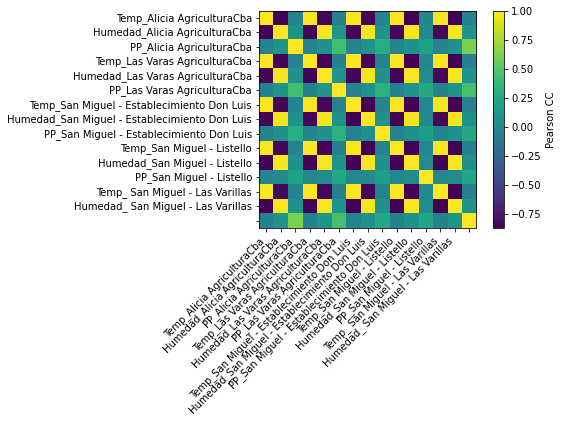

In [ ]:
plt.imshow(corr_matrix)

# Set ticks
xt = plt.xticks(np.arange(15), df.columns[3:-1], rotation=45, ha='right', va='top')
yt = plt.yticks(np.arange(15), df.columns[3:-1], rotation=0, ha='right', va='center')

# Set colorbar
plt.colorbar(label='Pearson CC')

In [ ]:
variables= df.columns
variables

Index(['fecha_completa', 'Fecha', 'Hora', 'Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

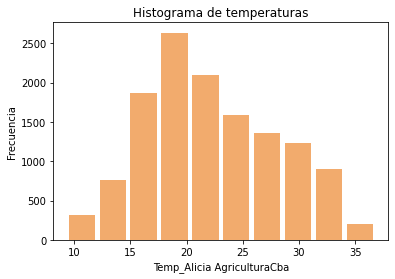

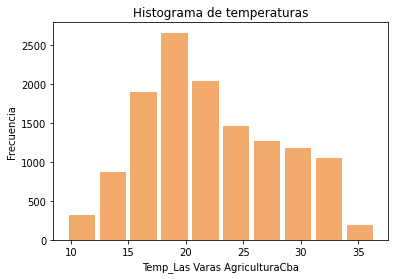

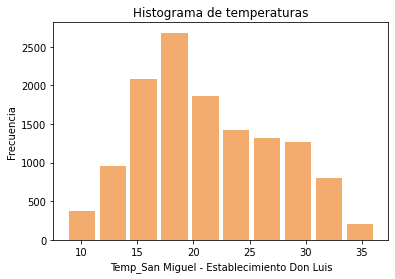

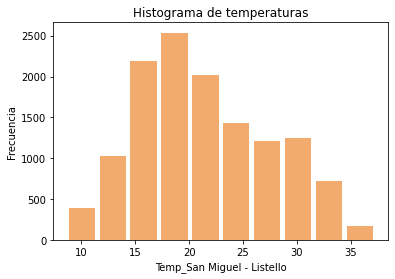

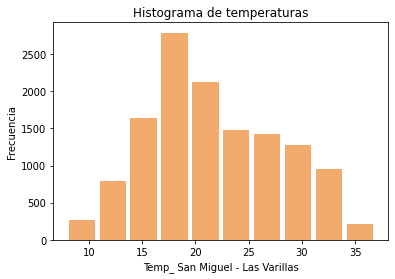

In [ ]:

#histograma de las temperaturas en las distintas estaciones
for i in range(3,18,3):
    plt.hist(df[variables[i]],color='#F2AB6D', rwidth=0.85,)
    plt.title('Histograma de temperaturas')
    plt.xlabel(variables[i])
    plt.ylabel('Frecuencia')
    plt.show() #dibujamos el histograma

# A simple vista se observa que la temperatura tiene una distribución muy similar a la normal.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ff1140a10>,
      dtype=object)

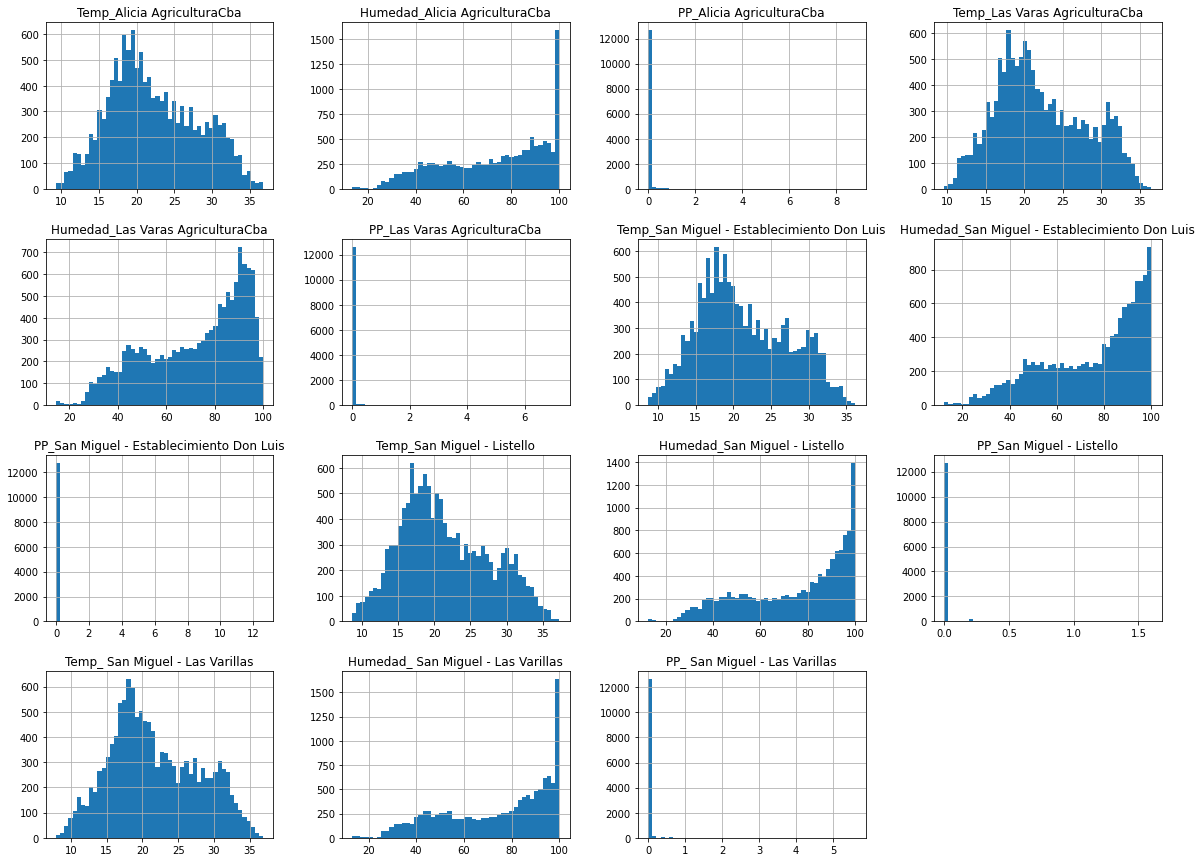

In [ ]:
df.hist(bins=50, figsize=(20,15))

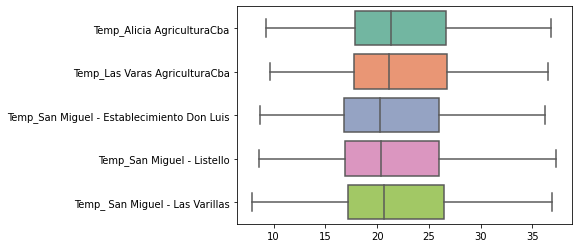

In [ ]:
# Box-Plots, no se aprecia en los datos ningun valor extremo, al menos con este procedimiento en la variable temperatura para las distintas estaciones.

ax = sns.boxplot(data=df[[variables[3], variables[6], variables[9],variables[12], variables[15]]], orient="h", palette="Set2")

In [ ]:
# Box-Plots, no se aprecia en los datos ningun valor extremo, al menos con este procedimiento en la variable temperatura para las distintas estaciones.

ax = sns.boxplot(data=df[[variables[4], variables[7], variables[10],variables[13], variables[16]]], orient="h", palette="Set2")

In [ ]:

groups = df.groupby(by='Fecha'). mean().reset_index()

groups

,Fecha,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
0,1/1/2021,22.956250,55.211111,0.000000,23.032639,58.201389,0.000000,22.350000,56.196528,0.000000,22.206944,61.009028,0.000000,22.435417,57.965278,0.000000
1,1/2/2021,20.119444,87.175694,0.005556,19.583333,85.803472,0.041667,18.930556,86.894444,0.029167,18.484028,86.985417,0.001389,19.690972,87.565278,0.012500
2,1/3/2021,25.302083,70.166667,0.000000,25.694444,71.372222,0.004167,24.120139,76.877778,0.004167,25.776389,73.913194,0.000000,24.709028,73.204167,0.000000
3,10/1/2021,27.030556,63.743056,0.000000,26.901389,63.758333,0.000000,25.722917,63.867361,0.000000,26.926389,66.501389,0.000000,26.049306,64.518056,0.000000
4,10/2/2021,21.714583,71.624306,0.000000,21.915278,71.590278,0.000000,20.868750,74.975000,0.000000,21.504861,72.215278,0.001389,22.251389,73.089583,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8/2/2021,21.256944,77.682639,0.000000,20.926389,79.344444,0.000000,20.447222,79.772222,0.000000,19.562500,82.920833,0.000000,20.997917,82.900694,0.000000
86,8/3/2021,22.198611,66.061806,0.000000,22.468750,67.053472,0.000000,20.645139,74.448611,0.000000,22.056250,73.277083,0.000000,21.304167,69.333333,0.000000
87,9/1/2021,23.168056,63.456250,0.022222,23.271528,65.038889,0.016667,22.574306,65.472222,0.022222,23.416667,68.282639,0.020833,22.597917,66.256250,0.016667
88,9/2/2021,20.329861,80.645833,0.000000,20.638889,80.910417,0.000000,19.778472,82.725694,0.000000,19.762500,81.705556,0.001389,20.993056,82.224306,0.000000


No handles with labels found to put in legend.


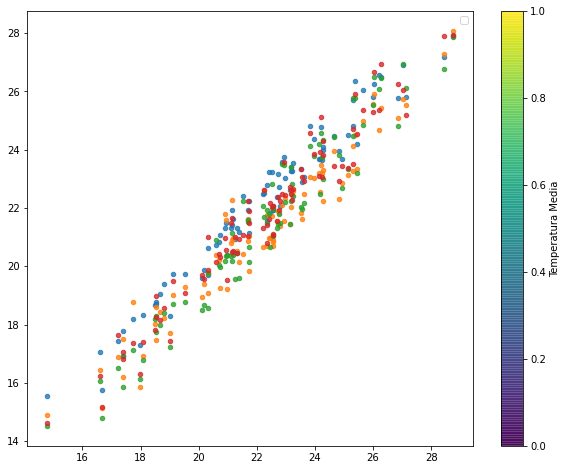

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


for i in range(3,18,3):
    if i <15:
      scat = ax.scatter(groups[variables[3]], groups[variables[i+3]], alpha=0.8,s=20)
    #scat = ax.scatter(g.longitude, g.latitude, alpha=0.1, s=2, label=groups[variables[i]])
plt.colorbar(scat, label='Temperatura Media')
leg = ax.legend()
# save_fig("better_visualization_plot")

In [3]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [15]:
df1=df[['Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas']]

In [16]:
df1.head()

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas
0,16.8,77.8,0.0,17.0,77.8,0.0,15.6,83.3,0.0,15.6,85.4,0.0,15.3,87.2,0.0
1,16.7,80.0,0.0,16.8,80.4,0.0,15.7,84.6,0.0,15.5,86.6,0.0,15.2,86.7,0.0
2,16.5,81.7,0.0,16.5,81.8,0.0,15.7,84.4,0.0,15.2,87.4,0.0,15.1,86.9,0.0
3,16.2,83.0,0.0,16.4,80.7,0.0,15.5,84.4,0.0,15.0,88.5,0.0,15.0,87.5,0.0
4,16.1,82.9,0.0,16.3,81.3,0.0,15.2,85.3,0.0,14.9,87.9,0.0,14.8,87.9,0.0


In [17]:
#normalizamos los datos
scaler=StandardScaler()

scaler.fit(df1) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df1)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=2) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [18]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))
#Vemos que con 2 componentes tenemos algo mas del 70% de varianza explicada

shape of X_pca (12960, 2)
[0.61595131 0.1564035 ]
suma: 0.77235480333684


In [19]:
componentes= pd.DataFrame(X_pca, columns= ["pc1", "pc2"] )

In [20]:
estandarizado= pd.DataFrame(X_scaled, columns= ['Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'] )

In [22]:
result = pd.concat([estandarizado, componentes], axis=1)
a=result.corr()
a

,Temp_Alicia AgriculturaCba,Humedad_Alicia AgriculturaCba,PP_Alicia AgriculturaCba,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,PP_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,PP_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,PP_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas,PP_ San Miguel - Las Varillas,pc1,pc2
Temp_Alicia AgriculturaCba,1.000000,-0.855478,-0.046852,0.986934,-0.849260,-0.054520,0.981354,-0.852691,-0.038764,0.984871,-0.867068,-0.012581,0.986801,-0.869937,-0.052938,9.609626e-01,6.222969e-02
Humedad_Alicia AgriculturaCba,-0.855478,1.000000,0.092315,-0.847509,0.976913,0.104700,-0.843577,0.970052,0.085725,-0.849606,0.973638,0.025532,-0.837187,0.982313,0.096491,-9.524895e-01,2.049911e-02
PP_Alicia AgriculturaCba,-0.046852,0.092315,1.000000,-0.041179,0.087344,0.435590,-0.037308,0.080291,0.299814,-0.042569,0.080602,0.196187,-0.041419,0.086333,0.621443,-9.018079e-02,7.891682e-01
Temp_Las Varas AgriculturaCba,0.986934,-0.847509,-0.041179,1.000000,-0.860043,-0.054480,0.983767,-0.850658,-0.034398,0.991461,-0.870375,-0.010651,0.988431,-0.870158,-0.050098,9.623945e-01,6.687047e-02
Humedad_Las Varas AgriculturaCba,-0.849260,0.976913,0.087344,-0.860043,1.000000,0.100670,-0.844531,0.970140,0.077085,-0.854681,0.983466,0.026863,-0.839664,0.980746,0.095457,-9.547405e-01,1.493478e-02
PP_Las Varas AgriculturaCba,-0.054520,0.104700,0.435590,-0.054480,0.100670,1.000000,-0.045221,0.090830,0.328748,-0.051575,0.093559,0.253571,-0.050341,0.099080,0.449902,-1.007165e-01,7.355644e-01
Temp_San Miguel - Establecimiento Don Luis,0.981354,-0.843577,-0.037308,0.983767,-0.844531,-0.045221,1.000000,-0.865415,-0.036565,0.982220,-0.866812,-0.000766,0.982729,-0.867195,-0.045403,9.588858e-01,7.371804e-02
Humedad_San Miguel - Establecimiento Don Luis,-0.852691,0.970052,0.080291,-0.850658,0.970140,0.090830,-0.865415,1.000000,0.073960,-0.855091,0.972979,0.015508,-0.841654,0.974240,0.085600,-9.537078e-01,2.328495e-03
PP_San Miguel - Establecimiento Don Luis,-0.038764,0.085725,0.299814,-0.034398,0.077085,0.328748,-0.036565,0.073960,1.000000,-0.032762,0.067897,0.168494,-0.030841,0.072385,0.254292,-7.496491e-02,5.579260e-01
Temp_San Miguel - Listello,0.984871,-0.849606,-0.042569,0.991461,-0.854681,-0.051575,0.982220,-0.855091,-0.032762,1.000000,-0.875068,-0.010471,0.986959,-0.874899,-0.051024,9.629514e-01,6.726678e-02


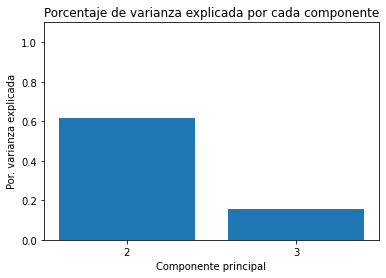

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(1,3) + 1,
    height = expl
)



ax.set_xticks(np.arange(2,4))
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');